In [101]:
# Loading the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [102]:
# Reading from a CSV file
df = pd.read_csv('sales_data.csv')
print (tabulate(df.head(8)))
# df

-  -  ---------  --  ---  ----------
0  1  Product_A  10   20  01-01-2023
1  2  Product_B   5   15  02-01-2023
2  3  Product_A   8   20  03-01-2023
3  4  Product_C  12   25  05-01-2023
4  5  Product_B   6   15  01-02-2023
5  6  Product_A  15   20  02-02-2023
6  7  Product_C  10   25  03-02-2023
7  8  Product_A   7  nan  01-03-2023
-  -  ---------  --  ---  ----------


In [103]:
missing_values_count = df.isnull().sum()

# Step 2: Create a DataFrame with columns and their respective missing values
missing_values_table = pd.DataFrame({
    'Column_names': missing_values_count.index,
    'Missing_Values': missing_values_count.values
})

# Print the table
print(missing_values_table)

df = df.fillna(df.mean())

# Print the DataFrame with NaN values replaced by mean
print(df)

  Column_names  Missing_Values
0      OrderID               0
1      Product               0
2     Quantity               0
3        Price               2
4         Date               0
    OrderID    Product  Quantity      Price        Date
0         1  Product_A        10  20.000000  01-01-2023
1         2  Product_B         5  15.000000  02-01-2023
2         3  Product_A         8  20.000000  03-01-2023
3         4  Product_C        12  25.000000  05-01-2023
4         5  Product_B         6  15.000000  01-02-2023
5         6  Product_A        15  20.000000  02-02-2023
6         7  Product_C        10  25.000000  03-02-2023
7         8  Product_A         7  20.357143  01-03-2023
8         9  Product_B         4  15.000000  02-03-2023
9        10  Product_C        14  25.000000  03-03-2023
10       11  Product_A        12  20.000000  01-04-2023
11       12  Product_B         8  20.357143  02-04-2023
12       13  Product_C        18  25.000000  03-04-2023
13       14  Product_A        

C:\Users\vaibh\AppData\Local\Temp/ipykernel_14232/1927881012.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


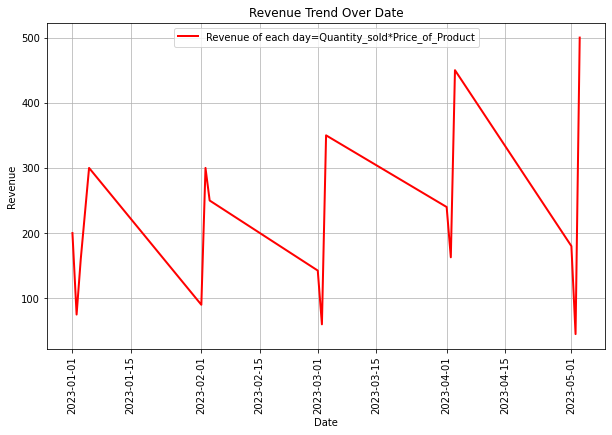

In [108]:
df['Date'] =pd.to_datetime(df['Date'], format='%d-%m-%Y')
# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Quantity']*df['Price'],c='red', linewidth = 2)
plt.xticks(rotation ='vertical') 
plt.title('Revenue Trend Over Date')
plt.legend(['Revenue of each day=Quantity_sold*Price_of_Product'],loc='upper center')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True,alpha=0.9)
plt.show()


In [97]:
total_orders = df['OrderID'].nunique()

# Calculate the total revenue generated from sales
total_revenue = (df['Quantity'] * df['Price']).sum()

# Print the results
print(f'Total Number of Orders: {total_orders}')
print(f'Total Revenue Generated: {total_revenue:.2f}')

Total Number of Orders: 16
Total Revenue Generated: 3200.00


Average Price of Each Product:
     Product  Average_Price
0  Product_A      20.040984
1  Product_B      16.648352
2  Product_C      25.000000


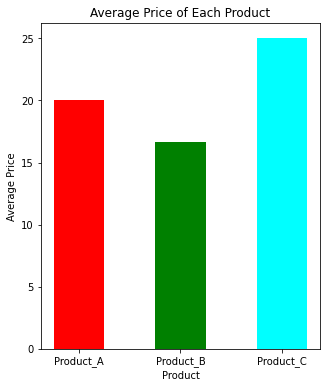


Top Most Sold Products:
     Product  Quantity
2  Product_C        74
0  Product_A        61
1  Product_B        26


In [91]:
average_price = df.groupby('Product').apply(lambda x: (x['Revenue']).sum() / x['Quantity'].sum()).reset_index()
average_price = average_price.rename(columns={0: 'Average_Price'})

print("Average Price of Each Product:")
print(average_price)

# Step 2: Create a bar plot to visualize the average price of each product
plt.figure(figsize=(5, 6))
plt.bar(average_price['Product'], average_price['Average_Price'],width=0.5, color=['red','green','cyan'])
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.title('Average Price of Each Product')
plt.show()

# Step 3: Identify and print the top most sold products
top_products = df.groupby('Product')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False)

print("\nTop Most Sold Products:")
print(top_products)